### Objective:
• Understand and practice principal component analysis using scikit learn.
### Questions:
1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.
[Hint: Explore datasets module from scikit learn]
2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.
3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]
4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.
[Hint: Project both the train and test samples to the new subspace]
5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_digits

In [8]:
digits = load_digits()

In [11]:
type(digits.data)

numpy.ndarray

In [12]:
digits.data.shape

(1797, 64)

In [13]:
plt.gray()

<Figure size 432x288 with 0 Axes>

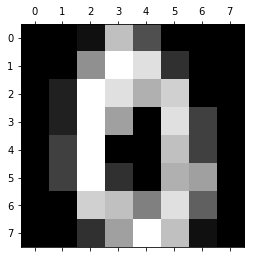

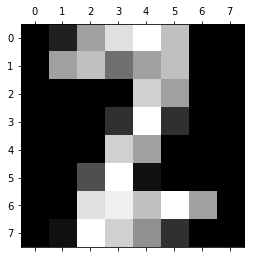

In [32]:
plt.matshow(digits.images[101])
plt.matshow(digits.images[1179])
plt.show()

In [25]:
dfdigits = pd.DataFrame(digits.data)

In [30]:
dfdigits.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1179,0.0,2.0,10.0,14.0,16.0,12.0,0.0,0.0,0.0,10.0,...,10.0,0.0,0.0,1.0,16.0,13.0,9.0,3.0,0.0,0.0
541,0.0,1.0,13.0,14.0,16.0,15.0,7.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,11.0,16.0,13.0,1.0,0.0,0.0
1071,0.0,0.0,6.0,15.0,12.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,16.0,15.0,3.0,0.0,0.0
303,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,7.0,15.0,8.0,0.0
595,0.0,0.0,1.0,12.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,7.0,0.0,0.0
1335,0.0,0.0,1.0,13.0,14.0,1.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,3.0,15.0,15.0,4.0,0.0,0.0
1067,0.0,1.0,13.0,14.0,2.0,0.0,0.0,0.0,0.0,7.0,...,2.0,0.0,0.0,1.0,12.0,14.0,13.0,6.0,0.0,0.0
758,0.0,0.0,0.0,8.0,14.0,15.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,7.0,0.0,0.0,0.0
32,0.0,2.0,13.0,16.0,16.0,16.0,11.0,0.0,0.0,5.0,...,0.0,0.0,0.0,2.0,16.0,15.0,8.0,0.0,0.0,0.0
39,0.0,1.0,9.0,16.0,13.0,7.0,0.0,0.0,0.0,7.0,...,5.0,0.0,0.0,0.0,9.0,14.0,13.0,10.0,1.0,0.0


In [34]:
dfdigits.iloc[1179]

0      0.0
1      2.0
2     10.0
3     14.0
4     16.0
5     12.0
6      0.0
7      0.0
8      0.0
9     10.0
10    12.0
11     7.0
12    10.0
13    12.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20    13.0
21    10.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     3.0
28    16.0
29     3.0
      ... 
34     0.0
35    13.0
36    10.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     5.0
43    16.0
44     1.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50    14.0
51    15.0
52    12.0
53    16.0
54    10.0
55     0.0
56     0.0
57     1.0
58    16.0
59    13.0
60     9.0
61     3.0
62     0.0
63     0.0
Name: 1179, Length: 64, dtype: float64

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
digits.target.shape

(1797,)

In [38]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
X = digits.data
y = digits.target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1 )

In [42]:
X_train.shape

(1437, 64)

In [44]:
X_test.shape

(360, 64)

In [45]:
logisticReg = LogisticRegression()

In [47]:
logisticReg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
prediction1 = logisticReg.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,prediction1)

0.9694444444444444

In [52]:
df = pd.DataFrame({"Actual":y_test,"Prediction":prediction1})

In [54]:
df.shape

(360, 2)

In [55]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(n_components=20)

In [84]:
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
pca.explained_variance_ratio_*100

array([14.89059358, 13.61877124, 11.79459376,  8.40997942,  5.78241466,
        4.91691032,  4.31598701,  3.66137256,  3.35324809,  3.0788062 ,
        2.37234057,  2.27269632,  1.82186189,  1.77384421,  1.46709542,
        1.40970847,  1.31856977,  1.24807744,  1.01765708,  0.90550513])

In [93]:
transformeddf = pd.DataFrame(pca.transform(digits.data))

In [111]:
transformeddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.259466,21.274883,-9.463055,13.014189,-7.128824,-7.440661,3.252829,2.553439,-0.581834,3.625701,2.586082,1.551503,0.855615,-3.336483,5.907339,2.742512,0.423731,-0.893898,0.721803,-3.465484
1,7.957611,-20.768699,4.439506,-14.893664,5.896248,-6.485619,2.126221,-4.615943,3.587457,-1.074706,-5.385626,-2.129450,-2.555292,-6.517158,-2.293667,-2.135262,-5.839450,4.471212,-1.961941,-5.256943
2,6.991923,-9.955986,2.958558,-12.288303,-18.126023,-4.507662,1.843129,-16.415171,0.719195,4.255822,-1.233385,-0.383789,0.206787,6.837974,-1.680806,-4.274719,6.726045,1.262779,0.172753,8.758838
3,-15.906105,3.332464,9.824372,-12.275838,6.965170,1.089484,-1.042083,10.973552,-3.259737,6.498735,-5.066813,2.396173,2.653578,-4.537509,0.796560,1.644986,-2.247067,-1.403772,3.068972,-3.874566
4,23.306867,4.269061,-5.675129,-13.851524,-0.358123,-2.857572,-0.720499,13.041663,-3.835378,13.414135,2.673426,-1.755717,-5.284157,1.518908,-0.667166,-6.417228,-9.507341,-1.969151,-3.048381,5.031988


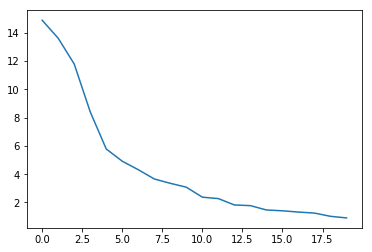

In [97]:
plt.plot(pca.explained_variance_ratio_*100)

In [100]:
Xtrans = transformeddf
ytrans = digits.target

In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(Xtrans ,digits.target, random_state=1)

In [102]:
logisticReg.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
newprediction = logisticReg.predict(xtest)

In [106]:
accuracy_score(ytest,newprediction)

0.9711111111111111

In [107]:
from sklearn.metrics import confusion_matrix

### Confusion Matrix

In [108]:
confusion_matrix(ytest,newprediction)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0, 48,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  0,  1,  0,  0,  2,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 47]], dtype=int64)